<a href="https://colab.research.google.com/github/nadah09/MachineAuditionHighSchool/blob/main/dynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dynamics and Amplitude

In this notebook, we will be learning more about the amplitude of a signal and how it affects the volume we hear. To begin, run the following block of code to install the libraries we need.

In [1]:
!wget "https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz"
!tar -xvf lib6003-0.0.4.tar.gz
!cd lib6003-0.0.4 && /usr/local/bin/python setup.py install
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install pyaudio

--2021-05-31 16:19:54--  https://sigproc.mit.edu/_static/spring21/software/lib6003-0.0.4.tar.gz
Resolving sigproc.mit.edu (sigproc.mit.edu)... 18.25.4.177
Connecting to sigproc.mit.edu (sigproc.mit.edu)|18.25.4.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21264 (21K) [application/x-tar]
Saving to: ‘lib6003-0.0.4.tar.gz.1’

lib6003-0.0.4.tar.g 100%[===================>]  20.77K  --.-KB/s    in 0s      

2021-05-31 16:19:54 (218 MB/s) - ‘lib6003-0.0.4.tar.gz.1’ saved [21264/21264]

lib6003-0.0.4/
lib6003-0.0.4/LICENSE
lib6003-0.0.4/MANIFEST.in
lib6003-0.0.4/PKG-INFO
lib6003-0.0.4/README
lib6003-0.0.4/lib6003/
lib6003-0.0.4/lib6003/__init__.py
lib6003-0.0.4/lib6003/audio.py
lib6003-0.0.4/lib6003/fft.py
lib6003-0.0.4/lib6003/image.py
lib6003-0.0.4/lib6003/wavfile.py
lib6003-0.0.4/lib6003.egg-info/
lib6003-0.0.4/lib6003.egg-info/PKG-INFO
lib6003-0.0.4/lib6003.egg-info/SOURCES.txt
lib6003-0.0.4/lib6003.egg-info/dependency_links.txt
lib6003-0.0.4/lib6003.egg-i

After this block runs, go to the top menu, hit 'Runtime', then 'Restart runtime'. You can then run the next block to import our libraries.

In [2]:
from lib6003.audio import wav_read, wav_write, wav_play
from math import sin, cos, pi, e
import pyaudio
import matplotlib.pyplot as plt 

Run the cell below. Here we define our sample rate, fs, or the number of samples our signal has per second. We also define a tune we will be working with for this activity. We define our tune in frequency, duration pairs, where each element of the list represents a pitch in hertz and a duration in seconds that we play the note.

In [3]:
fs = 22050

tune = [
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (369.99, 0.16666666666666666), (415.3, 0.16666666666666666),
    (440.0, 0.5), (369.99, 0.5), (369.99, 0.3333333333333333),
    (369.99, 0.16666666666666666), (369.99, 0.3333333333333333),
    (369.99, 0.3333333333333333), (329.63, 0.16666666666666666),
    (369.99, 0.3333333333333333), (369.99, 0.3333333333333333),
    (329.63, 0.16666666666666666), (329.63, 0.5),
    (246.94, 0.3333333333333333), (493.88, 0.3333333333333333),
    (246.94, 0.3333333333333333), (493.88, 0.6666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.16666666666666666), (440.0, 0.16666666666666666),
    (415.3, 0.16666666666666666), (369.99, 0.16666666666666666),
    (415.3, 0.3333333333333333), (369.99, 0.3333333333333333),
    (277.18, 1.3333333333333333), (246.94, 1.1666666666666665),
    (277.18, 0.16666666666666666), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.6666666666666666),
    (369.99, 0.6666666666666666), (277.18, 1.3333333333333333),
    (246.94, 1.3333333333333333), (277.18, 0.3333333333333333),
    (369.99, 0.3333333333333333), (415.3, 0.3333333333333333),
    (440.0, 0.3333333333333333), (415.3, 0.16666666666666666),
    (440.0, 0.16666666666666666), (415.3, 0.16666666666666666),
    (369.99, 0.16666666666666666), (415.3, 0.3333333333333333),
    (369.99, 0.3333333333333333), (277.18, 1.3333333333333333),
    (246.94, 1.1666666666666665), (277.18, 0.16666666666666666),
    (277.18, 0.3333333333333333), (369.99, 0.3333333333333333),
    (415.3, 0.3333333333333333), (440.0, 0.3333333333333333),
    (415.3, 0.6666666666666666), (369.99, 0.6666666666666666),
    (277.18, 1.3333333333333333), (246.94, 1.3333333333333333),
    (277.18, 1.3333333333333333)]

Below we see code to construct a tune from this frequency, duration list. We use our sampling rate to find the corresponding frequency, and append as many samples as we need to play the note for the duration given. We then return a list of samples that, when played, will sound like the song we gave the function.

In [4]:
def make_tune(tune):
    """
    Constructs wav file samples from frequency, duration list of notes and sampling rate
    """
    period = 0
    samples = []
    for freq, duration in tune:
        period += duration
        f = freq
        seconds = duration
        Omega = 2*pi*f/fs
        for n in range(int(seconds*fs)): # TODO: how many samples should we generate?
            samples.append(sin(Omega*n))
    return samples


Using this tune, we will now start exploring the amplitude property of signals! Below we have given you a helper function designed to alter the volume of the signal. If you give this function the result of the make_tune function, as well as a percentage change in volume (1 being same volume, 0.5 being half volume, and 2 being double volume) we can create different volumes for this music.

In [5]:
def adjust_volume(samples, volume = 1):
  """
  Reconstructs wav file given a list of samples from make_tune and a percentage change in volume (1 = same volume, 0.5 = half volume, 2 = double volume)
  """
  return [i*volume for i in samples]

Here we've included the code for synthesizing the tune above into a list of samples.

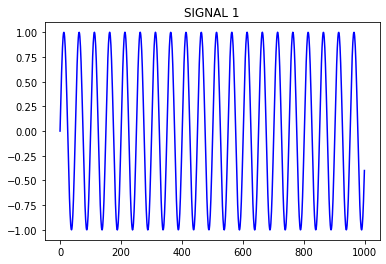

In [11]:
samples = make_tune(tune)
wav_write(samples,fs, "test.wav")
plt.title("SIGNAL 1")
plt.plot(samples[0:1000], '-b')
plt.show()

Now it's your turn to play with amplitude! Given this list of samples, make a new wav file with twice the amplitude, and another with half the amplitude.

In [7]:
doubled = #TODO: write code to make the same tune with twice the volume
wav_write(doubled,fs, "doubled.wav")
plt.plot(doubled[0:1000])
plt.show()

SyntaxError: ignored

In [ ]:
halved = #TODO: write code to make the same tune with half the volume
wav_write(halved,fs, "halved.wav")
plt.plot(halved[0:1000])
plt.show()

What do you notice about the two resulting files that you created? How does volume affect what you hear?

[ANSWER HERE]


What do you notice about the resulting waveforms plots? What features change?

[ANSWER HERE]


Now we want to try this in reverse. We are working with the following tune now:

In [16]:
tune = [(440, 0.5), (880, 0.5)]
samples = make_tune(tune)

We can plot the first hundred samples as follows:

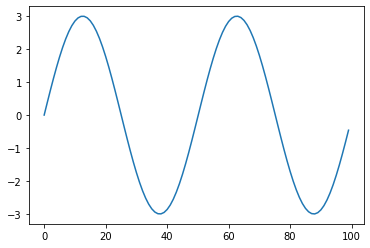

In [17]:
plt.plot(samples[0:100])

Now, suppose we give you the following plot, and you know that the only change made between our original tune and this one was an amplitude change.
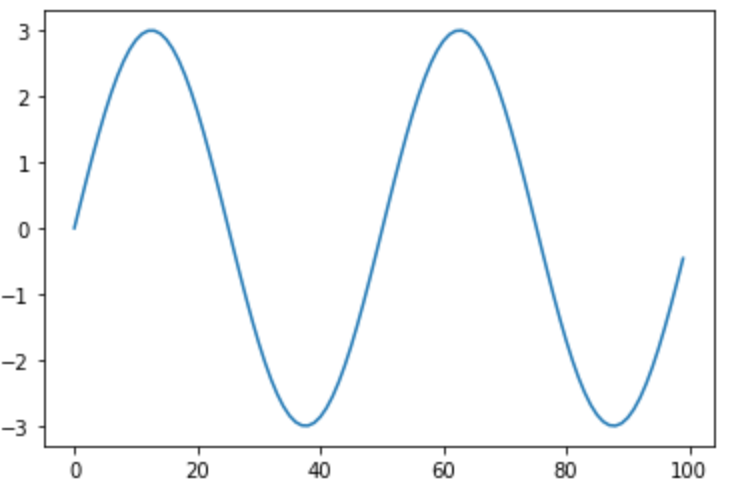

Using the adjust volume function, create a new tune that matches this plot. We then save this to a new wav file.

In [ ]:
new_samples = #TODO: match the plot
plt.plot(new_samples[0:100])
plt.show()
wav_write(new_samples, fs, "backsolve.wav")

How did you determine the correct volume adjustment for this waveform?

[ANSWER HERE]

You've successfully completed this activity! To finish, be sure to download all the wav files that you created in the files list on the left, and hit File -> Download -> Download .ipynb to download this notebook.